In [3]:
import tensorflow as tf

In [4]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.losses import sparse_categorical_crossentropy

In [5]:
mnist = tf.keras.datasets.fashion_mnist
(train_img, train_labels), (test_img, test_labels) = mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
train_img = train_img / 255.0
test_img = test_img / 255.0

In [13]:
train_img = train_img.reshape(60000, 28, 28, 1)
test_img = test_img.reshape(10000, 28, 28, 1)

In [8]:
layers = [
    Conv2D(64, (3,3), activation='relu', input_shape=(28, 28,1)),
    MaxPool2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
]

In [9]:
model = tf.keras.models.Sequential(layers)

In [10]:
model.compile(optimizer='adam', loss=sparse_categorical_crossentropy, metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [14]:
history = model.fit(train_img, train_labels, epochs=10, validation_data=(test_img, test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1754 - accuracy: 0.9342 - val_loss: 0.2649 - val_accuracy: 0.9068
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1543 - accuracy: 0.9422 - val_loss: 0.2604 - val_accuracy: 0.9094
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1360 - accuracy: 0.9492 - val_loss: 0.2665 - val_accuracy: 0.9116
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1205 - accuracy: 0.9541 - val_loss: 0.2755 - val_accuracy: 0.9107
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1056 - accuracy: 0.9600 - val_loss: 0.2880 - val_accuracy: 0.9115
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0929 - accuracy: 0.9654 - val_loss: 0.3213 - val_accuracy: 0.9092
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0839 - accuracy: 0.9683 - val_loss: 0.3500 - val_accuracy:

In [15]:
import matplotlib.pyplot as plt

1/1 [==============================] - 0s 14ms/step


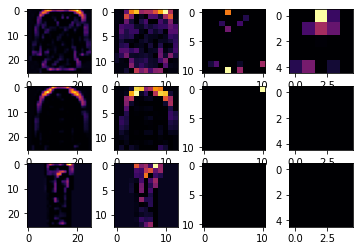

In [31]:
f, axarr = plt.subplots(3,4)

FIRST_IMAGE = 4
SECOND_IMAGE = 14
THIRD_IMAGE = 211

CONVOLUTION_NUMBER = 32 # numer filtru

layer_outputs = [layer.output for layer in model.layers]

activation_model = tf.keras.models.Model(inputs = model.input, outputs=layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_img[FIRST_IMAGE].reshape(1,28,28,1))[x]
  axarr[0, x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap = 'inferno')
  axarr[0, x].grid(False)

  f2 = activation_model.predict(test_img[SECOND_IMAGE].reshape(1,28,28,1))[x]
  axarr[1, x].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap = 'inferno')
  axarr[1, x].grid(False)

  f3 = activation_model.predict(test_img[THIRD_IMAGE].reshape(1,28,28,1))[x]
  axarr[2, x].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap = 'inferno')
  axarr[2, x].grid(False)
